In [1]:
# Import necessary libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# Use training set for building models

data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Discover contents of training set

print('Number of samples in data: ', data.shape[0])
print('Number of columns in data: ', data.shape[1])
print('Columns in data: ', data.columns.values)

Number of samples in data:  891
Number of columns in data:  12
Columns in data:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# Use test set for making predictions

test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Discover contents of test set

print('Number of samples in test set: ', test_data.shape[0])
print('Number of columns in test set: ', test_data.shape[1])
print('Columns in test set: ', test_data.columns.values)

Number of samples in test set:  418
Number of columns in test set:  11
Columns in test set:  ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [7]:
# Separate PassengerId and Survived from actually features
# Save them in Series for future needs

passenger_id_train = data['PassengerId']
survived_train = data['Survived']

passenger_id_test = test_data['PassengerId']

# Delete from train data
data.drop(columns=['PassengerId'], inplace=True)

# Delete from test data
test_data.drop(columns=['PassengerId'], inplace=True)

In [8]:
# Discover statistics about training data

data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check missing values in training data

data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Missing values found in Age, Cabin and Embarked features from training data

# Check missing values in test data
# (Missing values found in Age, Cabin and Fare features from test data)

test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### Сonclusions

There are 10 features in available data.
According to data description on https://www.kaggle.com/c/titanic/data:
1. Pclass - ticket class
2. Name
3. Sex
4. Age - age in years (missing values in training and test data)
5. SibSp - number of siblings / spouses aboard
6. Parch - number of parents / children aboard
7. Ticket - ticket number
8. Fare (missing values in test data)
9. Cabin - cabin number (missing values in training and test data)
10. Embarked - port of embarkation (missing values in train data)

### Next step:
Visualize available features, except missing values, to discover which of them are important predictors.

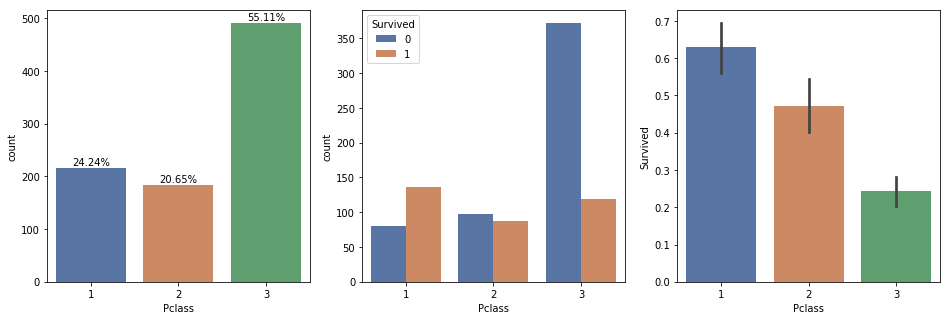

In [11]:
# Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd - ordinal feature.

sns.set_palette("deep")

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
sns.countplot(data["Pclass"], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['Pclass'].shape[0] * 100),
            ha="center")

sns.countplot(x="Pclass", hue="Survived", data=data, ax=ax2)
sns.barplot(x='Pclass', y='Survived', data=data, ax=ax3)

In [12]:
# Most people had 3rd class ticket. 3rd Pclass people mostly not survived.
# 1st Pclass people mostly survived.

data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


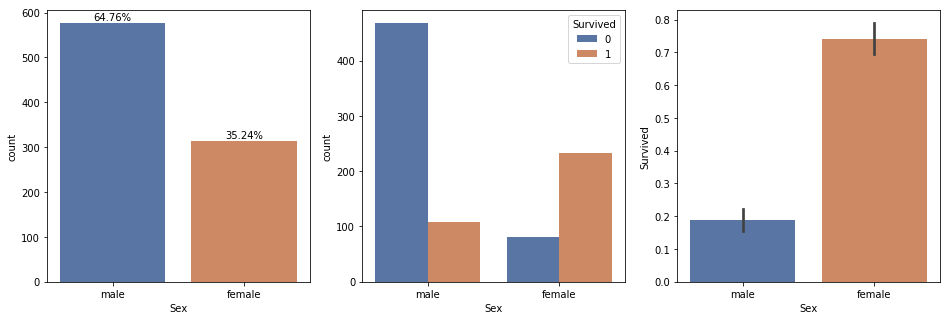

In [13]:
# Sex - male/female, categorical feature.

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5))
sns.countplot(data['Sex'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['Sex'].shape[0] * 100),
            ha='center')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax2)
sns.barplot(x='Sex', y='Survived', data=data, ax=ax3)

In [14]:
# Most people were males with less chance to survive

data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# Name - all values are unique, text feature, cannot be visualized.

pd.DataFrame(data['Name'].describe())

,Name
count,891
unique,891
top,"Karaic, Mr. Milan"
freq,1


In [16]:
# Name feature may contain Title feature to extract (Mr, Mrs etc.)

pd.DataFrame(data['Name'].head(10))

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


Percentage of missing values in Age (train) : 19.87 %
Percentage of missing values in Age (test) : 20.57 %
Minimum passenger age: 0.42
Maximum passenger age: 80.0


Text(0.5, 1.0, 'Age density plot over histogram')

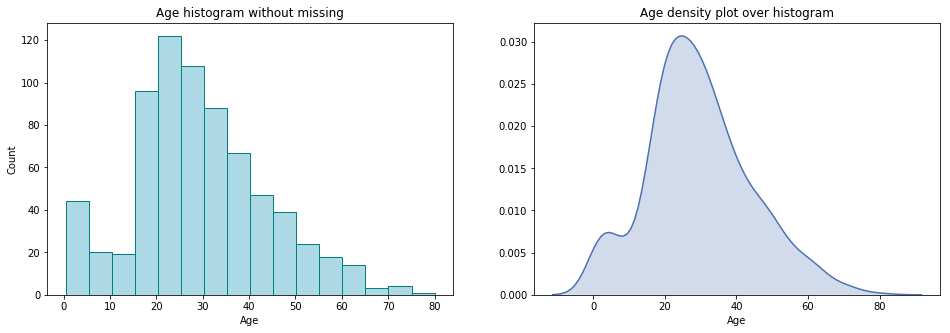

In [17]:
# Age - in years, contains missing values. Numerical continuous feature.

print('Percentage of missing values in Age (train) : {:.2f} %'.format(data['Age'].isnull().sum()/data.shape[0]*100))
print('Percentage of missing values in Age (test) : {:.2f} %'.format(test_data['Age'].isnull().sum()/test_data.shape[0]*100))
print('Minimum passenger age: {}'.format(data['Age'].min()))
print('Maximum passenger age: {}'.format(data['Age'].max()))

# Print Age histogram with binwidth of 5 years

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))
ax1.hist(data[data['Age'].notnull()]['Age'], color='lightblue', edgecolor='teal', bins=16)
ax1.set(xlabel='Age', ylabel='Count', title='Age histogram without missing')

# Plot Age feature shaded density plot

sns.distplot(data[data['Age'].notnull()]['Age'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax2)
plt.title('Age density plot over histogram')

Number of people with Age present: 714
Age present and Survived: 290
Age present and Died: 424


Text(0.5, 1.0, 'Age density plot for Survived and Died people')

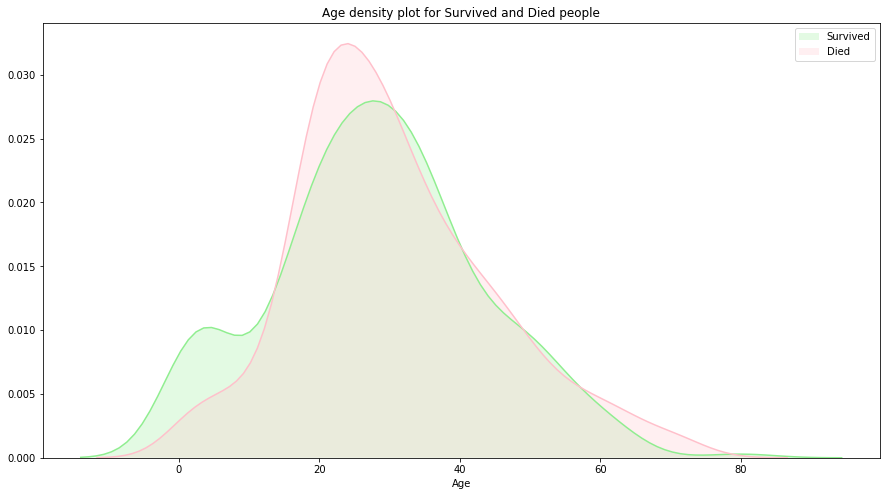

In [18]:
# Plot Age impact on the target variable

print('Number of people with Age present: {}'.format(data[data['Age'].notnull()]['Age'].shape[0]))

# Create separate dataframe without missing values in Age
age_present_data = data[data['Age'].notnull()]

print('Age present and Survived: {}'.format(age_present_data[['Age', 'Survived']][age_present_data.Survived==1].shape[0]))
print('Age present and Died: {}'.format(age_present_data[['Age', 'Survived']][age_present_data.Survived==0].shape[0]))

# Density plot of Age feature for Survived and Died People
plt.figure(figsize=(15,8))
sns.distplot(age_present_data['Age'][age_present_data.Survived==1],
             hist=False, kde=True, kde_kws={'shade':True}, color='lightgreen')
sns.distplot(age_present_data['Age'][age_present_data.Survived==0],
             hist=False, kde=True, kde_kws={'shade':True}, color='pink')
plt.legend(['Survived', 'Died'])
plt.title('Age density plot for Survived and Died people')

In [19]:
# Children (under 15-16 years) mostly survived.
# People older than 60 mostly died.
# Young people (16-35 years) mostly not survived.

# From numerical continuous Age feature can be converted into categorical:
# under 16, 16 - 35, 35-60, older than 60

# IsChild Feature may be added for separating people under 16.

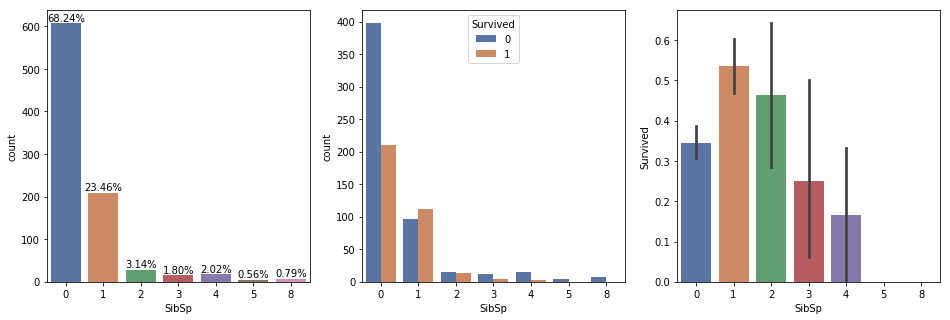

In [20]:
# SibSp - numerical discrete feature

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
sns.countplot(data["SibSp"], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['SibSp'].shape[0] * 100),
            ha="center")

sns.countplot(x="SibSp", hue="Survived", data=data, ax=ax2)
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax3)

In [21]:
# Most people had no siblings/spouses or just one.
# People with 1 SibSp were more likely to survive than people with other SibSp number variant
# Survival rate: 1, 2, 0, 3, 4.

data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


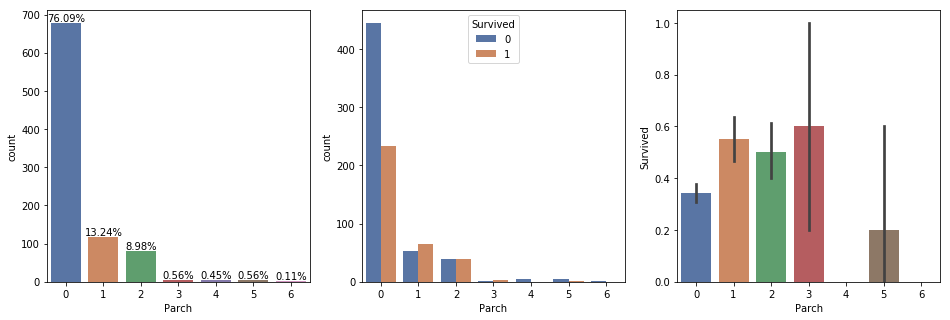

In [22]:
# Parch - numerical discrete feature

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
sns.countplot(data["Parch"], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['Parch'].shape[0] * 100),
            ha="center")

sns.countplot(x="Parch", hue="Survived", data=data, ax=ax2)
sns.barplot(x='Parch', y='Survived', data=data, ax=ax3)

In [23]:
# Most people had no parents/children or just 1-2 of these
# 1-2 Parch people were more likely to survive than people with other Parch number variant
# Survival rate: 3, 1, 2, 0, 5

# Parch and SibSp features can be grouped into FamilySize feature
# Alone feature may be created

data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [24]:
# Ticket - text feature with a lot of unique values, cannot be visualized.

pd.DataFrame(data['Ticket'].describe())

,Ticket
count,891
unique,681
top,CA. 2343
freq,7


In [25]:
# Fare - ticket fare, contains missing values. Numerical continuous feature.

print('Percentage of missing values in Fare (train) : {:.2f} %'.format(data['Fare'].isnull().sum()/data.shape[0]*100))
print('Percentage of missing values in Fare (test) : {:.2f} %'.format(test_data['Fare'].isnull().sum()/test_data.shape[0]*100))
print('Minimum passenger fare: {}'.format(data['Fare'].min()))
print('Maximum passenger fare: {}'.format(data['Fare'].max()))

Percentage of missing values in Fare (train) : 0.00 %
Percentage of missing values in Fare (test) : 0.24 %
Minimum passenger fare: 0.0
Maximum passenger fare: 512.3292


Text(0.5, 1.0, 'Fare density plot over histogram')

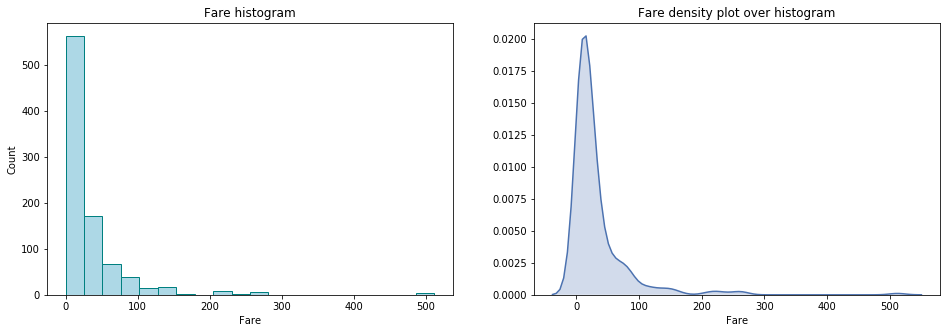

In [26]:
# Train data has no missing values in Fare column.
# Print Fare histogram
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))
ax1.hist(data['Fare'], color='lightblue', edgecolor='teal', bins=20)
ax1.set(xlabel='Fare', ylabel='Count', title='Fare histogram')

# Plot shaded density plot of Fare feature

sns.distplot(data['Fare'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax2)
plt.title('Fare density plot over histogram')

Text(0.5, 1.0, 'Age density plot for Survived and Died people')

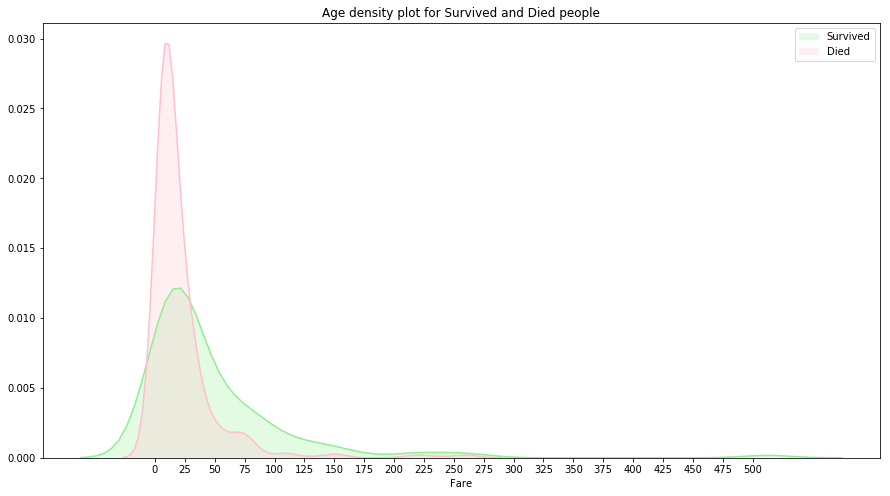

In [27]:
# Plot Fare impact on the target variable

# Density plot of Fare feature for Survived and Died People

plt.figure(figsize=(15,8))
sns.distplot(data['Fare'][data.Survived==1],
             hist=False, kde=True, kde_kws={'shade':True}, color='lightgreen')
sns.distplot(data['Fare'][data.Survived==0],
             hist=False, kde=True, kde_kws={'shade':True}, color='pink')
plt.xticks(np.arange(0, 512, 25))
plt.legend(['Survived', 'Died'])
plt.title('Age density plot for Survived and Died people')

In [28]:
# Most people with Fare bigger than 30 were more likely to survive.
# From numerical Fare feature can be converted into categorical: less than 30 or more than 30.

In [29]:
# Cabin - number of cabin, text feature with missing values in train and test data.

pd.DataFrame(data[data['Cabin'].notnull()]['Cabin'])

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103
21,D56
23,A6
27,C23 C25 C27
31,B78
52,D33


In [30]:
# Absence in Cabin data may convert this feature into categorical: present|absent cabin

print('Percentage of missing values in Cabin (train) : {:.2f} %'.format(data['Cabin'].isnull().sum()/data.shape[0]*100))
print('Percentage of missing values in Cabin (test) : {:.2f} %'.format(test_data['Cabin'].isnull().sum()/test_data.shape[0]*100))
pd.DataFrame(data['Cabin'].describe())

Percentage of missing values in Cabin (train) : 77.10 %
Percentage of missing values in Cabin (test) : 78.23 %


,Cabin
count,204
unique,147
top,G6
freq,4


Percentage of missing values in Embarked (train) : 0.22 %


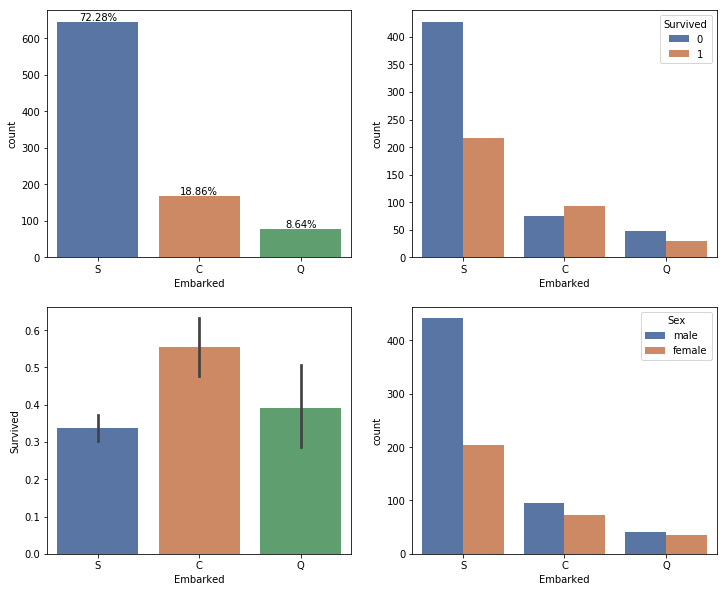

In [31]:
# Embarked: C = Cherbourg, Q = Queenstown, S = Southampton - port name
# Categorical feature with missing values in train data

print('Percentage of missing values in Embarked (train) : {:.2f} %'.format(data['Embarked'].isnull().sum()/data.shape[0]*100))

# Plot how many people embarked at different ports
# Plot how many people survived from these ports
# Plot counts of men and women embarked at different ports

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(data["Embarked"], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['Embarked'].shape[0] * 100),
            ha="center")

sns.countplot(x="Embarked", hue="Survived", data=data, ax=ax2)
sns.barplot(x='Embarked', y='Survived', data=data, ax=ax3)
sns.countplot(x="Embarked", hue="Sex", data=data, ax=ax4)

In [ ]:
# People from port C were more likely to survive.
# Most people embarked at port S.
# Among people who embarked at all three ports number of males was bigger.

### Сonclusions

1. Pclass - important ordinal feature, should be used.

2. Name - will be dropped.
    - Title - categorical feature, should be created and used.
    - Convert categorical into ordinal
    
3. Sex - important categorical feature, should be used.

4. Age - important numerical feature, should be used.

    - Age may be converted to categorical
    
    - Impute missing values in train.
    
    - Impute missing values in test.
    
    - IsChild - binary feature, may be created and used.
    
5. SibSp - important numerical feature.

6. Parch - important numerical feature.

    - FamilySize - numerical feature, should be created.
    
    - IsAlone - binary feature, may be created.
    
7. Ticket - will be dropped.

8. Fare - important numerical feature.

    - Fare may be converted into categorical
    
    - Impute missing values in test data.
    
9. Cabin - will be dropped.

    - HasCabin - binary feature, may be created after: 
    
    - Impute missing values in train.
    
    - Impute missing values in test.
    
10. Embarked - categorical feature, will be used.

    - Impute missing values in train data
    - Convert categorical into ordinal

### Next step:
Impute missing values and use base models with no preprocessing.

In [32]:
# Fill mising Age values in train data 
data['Age'].fillna(data['Age'].median(skipna=True), inplace=True)

# Fill mising Age values in test data 
test_data['Age'].fillna(test_data['Age'].median(skipna=True), inplace=True)

# Check for missing values
print('Missing values in Age (train): {}'.format(data['Age'].isnull().sum()))
print('Missing values in Age (test): {}'.format(test_data['Age'].isnull().sum()))

Missing values in Age (train): 0
Missing values in Age (test): 0


In [33]:
data[['Fare', 'Pclass']].groupby('Pclass', as_index=False).median()

,Pclass,Fare
0,1,60.2875
1,2,14.2500
2,3,8.0500


In [34]:
# Fill missing Fare values in test data
test_data['Fare'].fillna(test_data['Fare'].median(skipna=True), inplace=True)

# Check for missing values
print('Missing values in Fare (test): {}'.format(test_data['Fare'].isnull().sum()))

Missing values in Fare (test): 0


In [35]:
# Fill missing Cabin values in train data
data['Cabin'].fillna('No cabin', inplace=True)

# Fill missing Cabin values in test data
test_data['Cabin'].fillna('No cabin', inplace=True)

# Check for missing values
print('Missing values in Cabin (train): {}'.format(data['Cabin'].isnull().sum()))
print('Missing values in Cabin (test): {}'.format(test_data['Cabin'].isnull().sum()))

Missing values in Cabin (train): 0
Missing values in Cabin (test): 0


In [36]:
# Remove 2 samples with missing Port of Embarkation
data = data[data['Embarked'].notnull()]

survived_train = data[data['Embarked'].notnull()]['Survived']

# Check if data contains no missing values
data.isnull().sum()
#test_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [37]:
# Use decision tree as a base model because:
# 1) it requires no preprocessing
# 2) features can be on different scales
# 3) features can be mixed: continuous + categorical

base_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
base_target = data[['Survived']]

In [38]:
# Make Pclass, Sex, Embarked categorical
base_data = pd.get_dummies(base_data, columns=['Pclass', 'Sex', 'Embarked'])
X_train, X_test, y_train, y_test = train_test_split(base_data, base_target, stratify=base_target, random_state=42)

In [39]:
base_tree = DecisionTreeClassifier(random_state=0)
base_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
# Accuracy of unrestricted tree base model without preprocessing

print("Accuracy on training set: {:.3f}".format(base_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(base_tree.score(X_test, y_test)))

Accuracy on training set: 0.983
Accuracy on test set: 0.771


Text(0, 0.5, 'Feature')

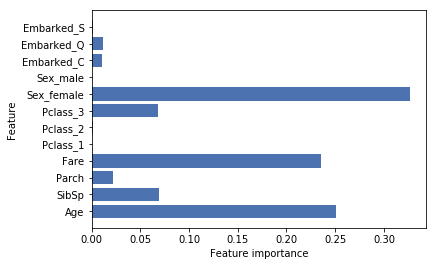

In [41]:
# Plot feature importances found by base model

n_features = base_data.shape[1]
plt.barh(range(n_features), base_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), base_data.columns.values)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [42]:
# Base model finds Sex (Sex_female), Age and Fare features as the most predictive of target 

# Create new features according to previous conclusions

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No cabin,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No cabin,S


In [43]:
# Title - categorical feature

# Train data
data.loc[:, 'Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data.loc[:, 'Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Sir           1
Jonkheer      1
Lady          1
Capt          1
Mme           1
Ms            1
Countess      1
Name: Title, dtype: int64

In [44]:
# Combine extracted titles into groups

data.loc[:, 'Title'] = data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Jonkheer', 'Countess',
                                      'Sir', 'Don', 'Capt', 'Lady'], 'Rare title')
data.loc[:, 'Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data.loc[:, 'Title'] = data['Title'].replace('Mme', 'Mrs')
data.loc[:, 'Title'].value_counts()

Mr            517
Miss          184
Mrs           125
Master         40
Rare title     23
Name: Title, dtype: int64

In [45]:
# Survival rate by Title
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.701087
0,Master,0.575000
4,Rare title,0.347826
2,Mr,0.156673


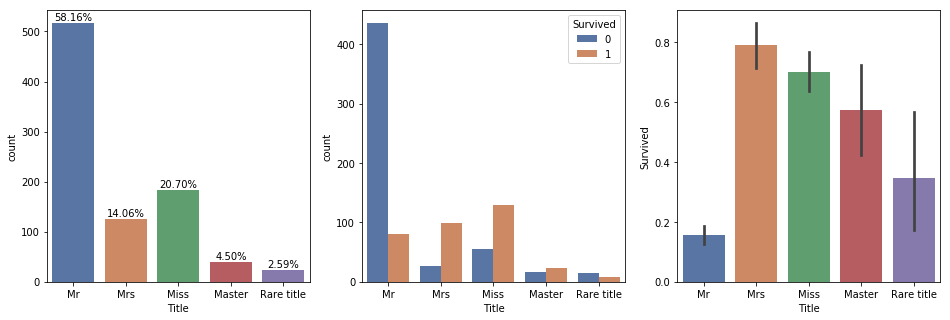

In [46]:
# Plot counts of people with different titles
# Plot how many people with different titles survived|died

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5))
sns.countplot(data['Title'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['Title'].shape[0] * 100),
            ha='center')
sns.countplot(x='Title', hue='Survived', data=data, ax=ax2)
sns.barplot(x='Title', y='Survived', data=data, ax=ax3)

In [47]:
# Mrs and Miss were more likeky to survive

# Convert categorical title into ordinal 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare title": 5}
data.loc[:, 'Title'] = data['Title'].map(title_mapping)

# Drop Name feature
data = data.drop(['Name'], axis=1)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,No cabin,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,male,35.0,0,0,373450,8.0500,No cabin,S,1


In [48]:
# Test data
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [49]:
# Combine extracted titles into groups in test data

# Add 'Dona' to Rare title group
test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Jonkheer', 'Countess',
                                      'Sir', 'Don', 'Dona', 'Capt', 'Lady'], 'Rare title')
test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare title      6
Name: Title, dtype: int64

In [50]:
# Convert categorical title into ordinal 

test_data['Title'] = test_data['Title'].map(title_mapping)

# Drop Name feature from test data
test_data = test_data.drop(['Name'], axis=1)

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,34.5,0,0,330911,7.8292,No cabin,Q,1
1,3,female,47.0,1,0,363272,7.0000,No cabin,S,3
2,2,male,62.0,0,0,240276,9.6875,No cabin,Q,1
3,3,male,27.0,0,0,315154,8.6625,No cabin,S,1
4,3,female,22.0,1,1,3101298,12.2875,No cabin,S,3


In [51]:
# Convert categorical sex feature into ordinal

# Train data
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Test data
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1}).astype(int)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,No cabin,S,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,0,35.0,0,0,373450,8.0500,No cabin,S,1


In [52]:
# Visible Age categories (in years): under 16, 16 - 35, 35-60, older than 60

# Train data - create AgeCat feature 
data.loc[data['Age'] <= 16, 'AgeCat'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <=35), 'AgeCat'] = 1
data.loc[(data['Age'] > 35) & (data['Age'] < 60), 'AgeCat'] = 2
data.loc[data['Age'] >= 60, 'AgeCat'] = 3

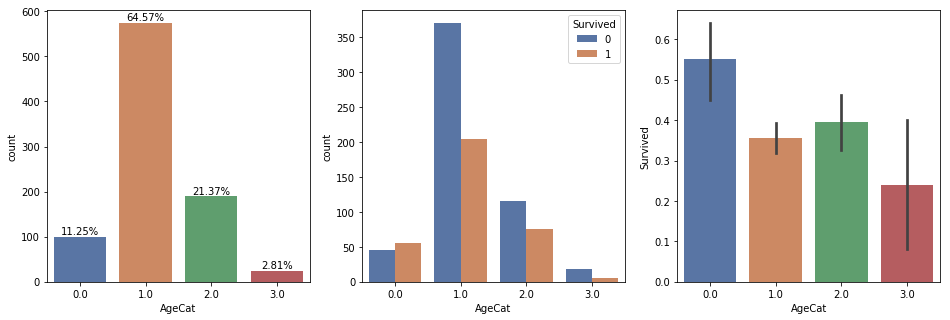

In [53]:
# Plot counts of people with different AgeCat categories
# How many people with different AgeCat category survived|died

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5))
sns.countplot(data['AgeCat'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['AgeCat'].shape[0] * 100),
            ha='center')
sns.countplot(x='AgeCat', hue='Survived', data=data, ax=ax2)
sns.barplot(x='AgeCat', y='Survived', data=data, ax=ax3)

In [54]:
# Most people were 16-35 years old
# People under 16 were likely to survive than others

# Survival rate by AgeCat category
data[['AgeCat', 'Survived']].groupby(['AgeCat'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeCat,Survived
0,0.0,0.550000
2,2.0,0.394737
1,1.0,0.355401
3,3.0,0.240000


In [55]:
# Add binary feature IsChild 

data['Child'] = np.where(data['AgeCat'] == 0, 1, 0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat,Child
0,0,3,0,22.0,1,0,A/5 21171,7.2500,No cabin,S,1,1.0,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,2.0,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,2,1.0,0
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3,1.0,0
4,0,3,0,35.0,0,0,373450,8.0500,No cabin,S,1,1.0,0


In [56]:
# Test data
test_data.loc[test_data['Age'] <= 16, 'AgeCat'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <=35), 'AgeCat'] = 1
test_data.loc[(test_data['Age'] > 35) & (test_data['Age'] < 60), 'AgeCat'] = 2
test_data.loc[test_data['Age'] >= 60, 'AgeCat'] = 3

In [57]:
test_data['Child'] = np.where(test_data['AgeCat'] == 0, 1, 0)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat,Child
0,3,0,34.5,0,0,330911,7.8292,No cabin,Q,1,1.0,0
1,3,1,47.0,1,0,363272,7.0000,No cabin,S,3,2.0,0
2,2,0,62.0,0,0,240276,9.6875,No cabin,Q,1,3.0,0
3,3,0,27.0,0,0,315154,8.6625,No cabin,S,1,1.0,0
4,3,1,22.0,1,1,3101298,12.2875,No cabin,S,3,1.0,0


In [59]:
# Create numerical feature FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Create binary feature Alone
data['Alone'] = np.where(data['FamilySize'] == 1, 1, 0)
test_data['Alone'] = np.where(test_data['FamilySize'] == 1, 1, 0)

In [60]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat,Child,FamilySize,Alone
0,0,3,0,22.0,1,0,A/5 21171,7.2500,No cabin,S,1,1.0,0,2,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,2.0,0,2,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,2,1.0,0,1,1
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3,1.0,0,2,0
4,0,3,0,35.0,0,0,373450,8.0500,No cabin,S,1,1.0,0,1,1


In [61]:
# Survival rate for alone people|people with family
data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# People with family were more likely to survive

,Alone,Survived
0,0,0.505650
1,1,0.300935


In [62]:
# Survival rate people with different FamilySize
data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


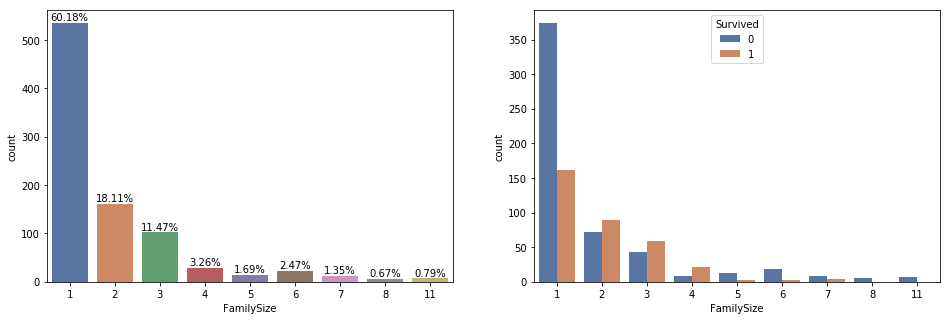

In [63]:
# Plot counts of people with different FamilySize
# How many people with different FamilySize survived|died

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(data['FamilySize'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['FamilySize'].shape[0] * 100),
            ha='center')
sns.countplot(x='FamilySize', hue='Survived', data=data, ax=ax2)

In [64]:
# Drop SibSp, Parch and Ticket features from  data
data = data.drop(['SibSp', 'Parch', 'Ticket'], axis=1)
test_data = test_data.drop(['SibSp', 'Parch', 'Ticket'], axis=1)

In [65]:
#data.head()
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,AgeCat,Child,FamilySize,Alone
0,3,0,34.5,7.8292,No cabin,Q,1,1.0,0,1,1
1,3,1,47.0,7.0000,No cabin,S,3,2.0,0,2,0
2,2,0,62.0,9.6875,No cabin,Q,1,3.0,0,1,1
3,3,0,27.0,8.6625,No cabin,S,1,1.0,0,1,1
4,3,1,22.0,12.2875,No cabin,S,3,1.0,0,3,0


In [67]:
# Create AgeCat*Pclass feature
data['AgeCat*Class'] = data['AgeCat']*data['Pclass']
test_data['AgeCat*Class'] = test_data['AgeCat']*test_data['Pclass']
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,AgeCat,Child,FamilySize,Alone,AgeCat*Class
0,0,3,0,22.0,7.2500,No cabin,S,1,1.0,0,2,0,3.0
1,1,1,1,38.0,71.2833,C85,C,3,2.0,0,2,0,2.0
2,1,3,1,26.0,7.9250,No cabin,S,2,1.0,0,1,1,3.0
3,1,1,1,35.0,53.1000,C123,S,3,1.0,0,2,0,1.0
4,0,3,0,35.0,8.0500,No cabin,S,1,1.0,0,1,1,3.0


In [69]:
# Visible Fare categories: less than 30, more than 30, create FareCat categorical feature

# Train data
data.loc[data['Fare'] <= 30, 'FareCat'] = 0
data.loc[data['Fare'] > 30, 'FareCat'] = 1

# Test data
test_data.loc[test_data['Fare'] <= 30, 'FareCat'] = 0
test_data.loc[test_data['Fare'] > 30, 'FareCat'] = 1

In [70]:
# Survival rate people with different FareCat 
data[['FareCat', 'Survived']].groupby(['FareCat'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareCat,Survived
1,1.0,0.577586
0,0.0,0.313546


In [71]:
# Create HasCabin feature
data['HasCabin'] = 1
data.loc[data['Cabin'] == 'No cabin', 'HasCabin'] = 0

# Test data
test_data['HasCabin'] = 1
test_data.loc[test_data['Cabin'] == 'No cabin', 'HasCabin'] = 0

In [72]:
# Drop Cabin feature
data = data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

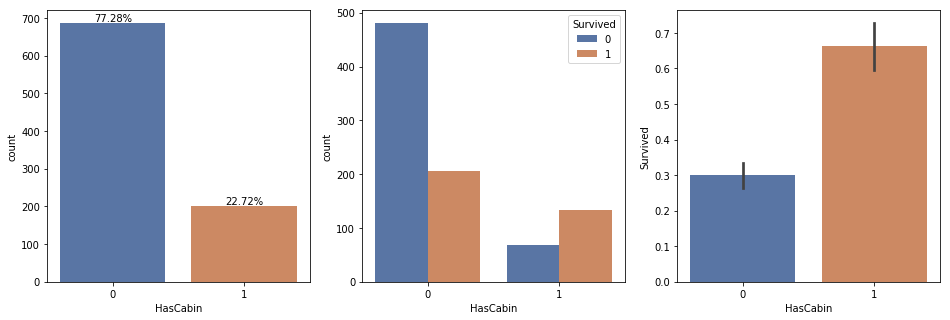

In [73]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5))
sns.countplot(data['HasCabin'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / data['HasCabin'].shape[0] * 100),
            ha='center')
sns.countplot(x='HasCabin', hue='Survived', data=data, ax=ax2)
sns.barplot(x='HasCabin', y='Survived', data=data, ax=ax3)

In [74]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeCat,Child,FamilySize,Alone,AgeCat*Class,FareCat,HasCabin
0,0,3,0,22.0,7.2500,S,1,1.0,0,2,0,3.0,0.0,0
1,1,1,1,38.0,71.2833,C,3,2.0,0,2,0,2.0,1.0,1
2,1,3,1,26.0,7.9250,S,2,1.0,0,1,1,3.0,0.0,0
3,1,1,1,35.0,53.1000,S,3,1.0,0,2,0,1.0,1.0,1
4,0,3,0,35.0,8.0500,S,1,1.0,0,1,1,3.0,0.0,0


In [75]:
# Convert categorical Embarked feature into ordinal

data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [76]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeCat,Child,FamilySize,Alone,AgeCat*Class,FareCat,HasCabin
0,0,3,0,22.0,7.2500,0,1,1.0,0,2,0,3.0,0.0,0
1,1,1,1,38.0,71.2833,1,3,2.0,0,2,0,2.0,1.0,1
2,1,3,1,26.0,7.9250,0,2,1.0,0,1,1,3.0,0.0,0
3,1,1,1,35.0,53.1000,0,3,1.0,0,2,0,1.0,1.0,1
4,0,3,0,35.0,8.0500,0,1,1.0,0,1,1,3.0,0.0,0


In [77]:
print('Number of samples in train data: ', data.shape[0])
print('Number of columns in train data: ', data.shape[1])
print('Number of samples in test data: ', test_data.shape[0])
print('Number of columns in test data: ', test_data.shape[1])

Number of samples in train data:  889
Number of columns in train data:  14
Number of samples in test data:  418
Number of columns in test data:  13


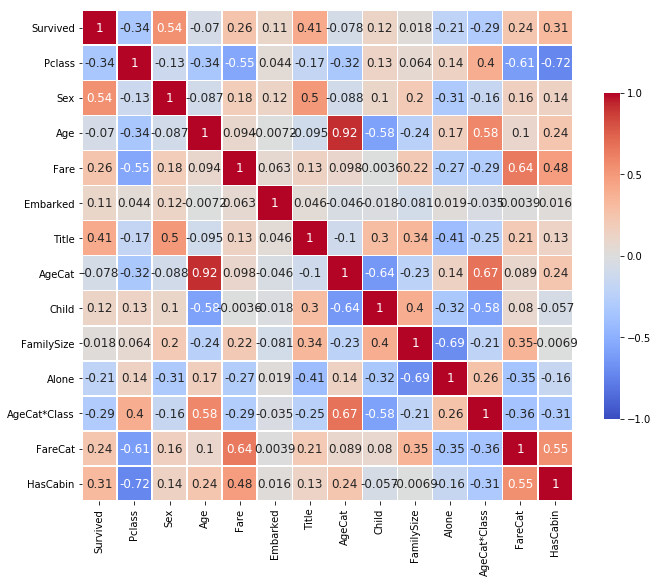

In [79]:
# Plot correlation matrix of features + target

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(11, 15))
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [80]:
# Prepare data for modeling

base_data_2 = data[['Pclass', 'Sex', 'AgeCat', 'FareCat', 'Embarked', 'Title',
                    'FamilySize', 'AgeCat*Class', 'Alone', 'Child']]
base_target_2 = data['Survived']

In [82]:
# Check data shapes

print('Features shape: {}'.format(base_data_2.shape))
print('Target shape: {}'.format(base_target_2.shape))

Features shape: (889, 10)
Target shape: (889,)


In [83]:
base_data_2.head()

,Pclass,Sex,AgeCat,FareCat,Embarked,Title,FamilySize,AgeCat*Class,Alone,Child
0,3,0,1.0,0.0,0,1,2,3.0,0,0
1,1,1,2.0,1.0,1,3,2,2.0,0,0
2,3,1,1.0,0.0,0,2,1,3.0,1,0
3,1,1,1.0,1.0,0,3,2,1.0,0,0
4,3,0,1.0,0.0,0,1,1,3.0,1,0


In [84]:
# Split data into new train and test sets

X_train, X_test, y_train, y_test = train_test_split(base_data_2, base_target_2,
                                                   stratify=base_target_2, random_state=42)

In [85]:
# Use several classifiers with default parameters and simple random split 

# Try KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy (train): {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy (test): {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy (train): 0.856
Accuracy (test): 0.771


In [86]:
# Try Logistic Regression

logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
print('Accuracy (train): {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy (test): {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy (train): 0.820
Accuracy (test): 0.807


In [87]:
# Try Linear Support Vector Machines

linearSVM = LinearSVC(max_iter=10000)
linearSVM.fit(X_train, y_train)
print('Accuracy (train): {:.3f}'.format(linearSVM.score(X_train, y_train)))
print('Accuracy (test): {:.3f}'.format(linearSVM.score(X_test, y_test)))

Accuracy (train): 0.823
Accuracy (test): 0.798


In [88]:
# Try GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)
print('Accuracy (train): {:.3f}'.format(gaussianNB.score(X_train, y_train)))
print('Accuracy (test): {:.3f}'.format(gaussianNB.score(X_test, y_test)))

Accuracy (train): 0.775
Accuracy (test): 0.735


In [90]:
# Try Decision Tree Classifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Accuracy (train): {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy (test): {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy (train): 0.883
Accuracy (test): 0.744


In [91]:
# Try Random Forest Classifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print('Accuracy (train): {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy (test): {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy (train): 0.883
Accuracy (test): 0.740


In [92]:
# Try Gradient Boosting Classifier

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
print('Accuracy (train): {:.3f}'.format(gbc.score(X_train, y_train)))
print('Accuracy (test): {:.3f}'.format(gbc.score(X_test, y_test)))

Accuracy (train): 0.866
Accuracy (test): 0.807


In [94]:
# Estimate classifiers using cross-validation

classifiers = [KNeighborsClassifier(), LogisticRegression(solver='lbfgs'),
              LinearSVC(max_iter=10000), GaussianNB(), DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100, random_state=0),
              GradientBoostingClassifier(random_state=0)]
classifiers_names = ['kNN', 'LogRegression', 'Linear SVM',
                    'GaussianNB', 'Decision Tree', 'Random Forest',
                    'Gradient Boosting']
for classifier, name in zip(classifiers, classifiers_names):
    classifier.fit(base_data_2, base_target_2)
    accuracy = cross_val_score(estimator = classifier, X = base_data_2, y = base_target_2, cv = 10)
    print(name, 'accuracy:')
    print(accuracy)
    print(name, 'mean CV accuracy: {:.3f}'.format(accuracy.mean()), '\n')
    

kNN accuracy:
[0.76404494 0.82022472 0.74157303 0.82022472 0.83146067 0.65168539
 0.78651685 0.78651685 0.80898876 0.81818182]
kNN mean CV accuracy: 0.783 

LogRegression accuracy:
[0.78651685 0.82022472 0.76404494 0.87640449 0.80898876 0.79775281
 0.80898876 0.80898876 0.82022472 0.81818182]
LogRegression mean CV accuracy: 0.811 

Linear SVM accuracy:
[0.78651685 0.84269663 0.75280899 0.86516854 0.82022472 0.79775281
 0.82022472 0.82022472 0.83146067 0.81818182]
Linear SVM mean CV accuracy: 0.816 

GaussianNB accuracy:
[0.68539326 0.74157303 0.78651685 0.80898876 0.78651685 0.7752809
 0.7752809  0.80898876 0.78651685 0.76136364]
GaussianNB mean CV accuracy: 0.772 

Decision Tree accuracy:
[0.75280899 0.83146067 0.74157303 0.83146067 0.82022472 0.82022472
 0.79775281 0.79775281 0.83146067 0.81818182]
Decision Tree mean CV accuracy: 0.804 

Random Forest accuracy:
[0.79775281 0.84269663 0.75280899 0.84269663 0.83146067 0.83146067
 0.79775281 0.79775281 0.84269663 0.81818182]
Random Fore

In [95]:
# Tune the hyper-parameters of classifiers with GridSearch CV

# kNN

knn_grid = [{'n_neighbors': list(range(1, 15)),
            'weights': ['uniform', 'distance']}]
knn_gs = GridSearchCV(KNeighborsClassifier(),
                 param_grid=knn_grid, scoring='accuracy',
                  cv=10)
knn_gs.fit(base_data_2, base_target_2)
best_acc_knn = knn_gs.best_score_
best_params_knn = knn_gs.best_params_
print('kNN best score {:.6f}'.format(best_acc_knn))
print('Best parameters: ', best_params_knn)

kNN best score 0.820022
Best parameters:  {'n_neighbors': 12, 'weights': 'uniform'}


In [97]:
# Logistic regression

logreg_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
logreg_gs = GridSearchCV(LogisticRegression(solver='lbfgs'),
                        param_grid=logreg_grid, scoring='accuracy',
                        cv=10)
logreg_gs.fit(base_data_2, base_target_2)
best_acc_logreg = logreg_gs.best_score_
best_params_logreg = logreg_gs.best_params_
print('Logistic Regresion best score {:.4f}'.format(best_acc_logreg))
print('Best parameters: ', best_params_logreg)

Logistic Regresion best score 0.8155
Best parameters:  {'C': 0.1}


In [98]:
# Linear SVM

# Scale data
prep_data = base_data.astype('float')
scaler = MinMaxScaler()
prep_data = scaler.fit_transform(prep_data)

linearSVM_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
linearSVM_gs = GridSearchCV(LinearSVC(max_iter=1000000, random_state=0),
                        param_grid=linearSVM_grid, scoring='accuracy',
                        cv=10)
linearSVM_gs.fit(prep_data, base_target_2)
best_acc_linearSVM = linearSVM_gs.best_score_
best_params_linearSVM = linearSVM_gs.best_params_
print('Linear SVM best score {:.4f}'.format(best_acc_linearSVM))
print('Best parameters: ', best_params_linearSVM)

Linear SVM best score 0.8110
Best parameters:  {'C': 0.001}


In [99]:
# Decision tree 
# Invariant to scaling of the data

tree_grid = [{'max_depth': list(range(1, 15)),
             'min_samples_split': list(range(2, 20)),
             'max_features': ['auto', 'log2']}]
tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=0),
                      param_grid=tree_grid, scoring='accuracy',
                      cv=10)
tree_gs.fit(base_data_2, base_target_2)
best_acc_tree = tree_gs.best_score_
best_params_tree_gs = tree_gs.best_params_
print('Single tree best score {:.4f}'.format(best_acc_tree))
print('Best parameters: ', best_params_tree_gs)

Single tree best score 0.8324
Best parameters:  {'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 8}


In [100]:
# Random Forest

forest_grid = [{'n_estimators': [10, 50, 100, 300],
               'max_features': ['auto', 'log2'],
               'max_depth': [1, 4, 5, 6, 8, 10, 15],
               'min_samples_split': [2, 4, 10, 20],
               'min_samples_leaf': [1, 2, 4]}]
forest_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                        param_grid=forest_grid, scoring='accuracy',
                        cv=10, n_jobs=-1)
forest_gs.fit(base_data_2, base_target_2)
best_acc_forest = forest_gs.best_score_
best_params_forest = forest_gs.best_params_
print('Random forest best score {:.4f}'.format(best_acc_forest))
print('Best parameters: ', best_params_forest)

Random forest best score 0.8369
Best parameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [101]:
# Gradient boosting machines

gb_grid = [{'max_depth': [1, 2, 3, 4, 5],
           'n_estimators': [10, 30, 50, 70, 100, 500],
           'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.7, 0.5, 1] }]
gb_gs = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                    param_grid=gb_grid, scoring='accuracy',
                    cv=10, n_jobs=-1)
gb_gs.fit(base_data_2, base_target_2)
best_acc_gb = gb_gs.best_score_
best_params_gb = gb_gs.best_params_
print('Gradient boosting best score {:.4f}'.format(best_acc_gb))
print('Best parameters: ', best_params_gb)

Gradient boosting best score 0.8369
Best parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30}


In [110]:
# Use the most accurate model for prediction

gb_final = GradientBoostingClassifier(random_state=0, learning_rate=0.2,
                                     max_depth=3, n_estimators=30)
gb_final.fit(base_data_2, base_target_2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [111]:
test_data_final = test_data[['Pclass', 'Sex', 'AgeCat', 'FareCat', 'Embarked', 'Title',
                    'FamilySize', 'AgeCat*Class', 'Alone', 'Child']]

In [112]:
predictions = gb_final.predict(test_data_final)

In [113]:
submission = pd.DataFrame({'PassengerId': passenger_id_test,
                           'Survived': predictions})
submission.to_csv('submission.csv', index=False)